TASK 5

 To analyze traffic accident data to identify patterns related to road conditions,weather, and time of day and visualize accident hotspots and contributing factors.


In [27]:

#Import required libraries
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


In [28]:
#Load the data
Data=pd.read_csv('/content/drive/MyDrive/UK_Accident.csv')
Data

#Create a dataframe
df=pd.DataFrame(Data)
df


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [29]:

#First 5 rows of the dataset
df.head()


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [30]:
#Last 5 rows of the dataset
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014
1504149,464696,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [31]:
#Check for all the columns of the dataset
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [32]:
#Check for the number of rows and columns of the dataset
df.shape



(1504150, 33)

In [33]:
#Check for the information ,i.e, dtype and null value for each column
df.info

<bound method DataFrame.info of          Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
0                 0  200501BS00001               525680.0   
1                 1  200501BS00002               524170.0   
2                 2  200501BS00003               524520.0   
3                 3  200501BS00004               526900.0   
4                 4  200501BS00005               528060.0   
...             ...            ...                    ...   
1504145      464692       2.01E+12               310037.0   
1504146      464693       2.01E+12               321509.0   
1504147      464694       2.01E+12               321337.0   
1504148      464695       2.01E+12               323869.0   
1504149      464696       2.01E+12               314072.0   

         Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
0                      178240.0  -0.191170  51.489096             1   
1                      181650.0  -0.211708  51.520075             1   
2                     

In [34]:
#Check for Statistical Analysis
df.describe

<bound method NDFrame.describe of          Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
0                 0  200501BS00001               525680.0   
1                 1  200501BS00002               524170.0   
2                 2  200501BS00003               524520.0   
3                 3  200501BS00004               526900.0   
4                 4  200501BS00005               528060.0   
...             ...            ...                    ...   
1504145      464692       2.01E+12               310037.0   
1504146      464693       2.01E+12               321509.0   
1504147      464694       2.01E+12               321337.0   
1504148      464695       2.01E+12               323869.0   
1504149      464696       2.01E+12               314072.0   

         Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
0                      178240.0  -0.191170  51.489096             1   
1                      181650.0  -0.211708  51.520075             1   
2                   

In [35]:
#Datatype of each column
df.dtypes

Unnamed: 0                                       int64
Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limi

In [36]:
#  DATA CLEANING


#Check for the null values
print(df.isnull().sum())

Unnamed: 0                                          0
Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                              0
Longitude                                         101
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                 

In [37]:

#Remove unnecesary columns
df1=df.drop(['Location_Easting_OSGR','Longitude','LSOA_of_Accident_Location','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'],axis=1)
df1

#New dataframe without unnecesary columns
print(df1.isnull().sum())

Unnamed: 0                                       0
Accident_Index                                   0
Location_Northing_OSGR                           0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                           117
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Control                                 0
2nd_Road_Class                                   0
2nd_Road_Number                

DATA VISUALIZATION

Text(0, 0.5, 'Weekdays')

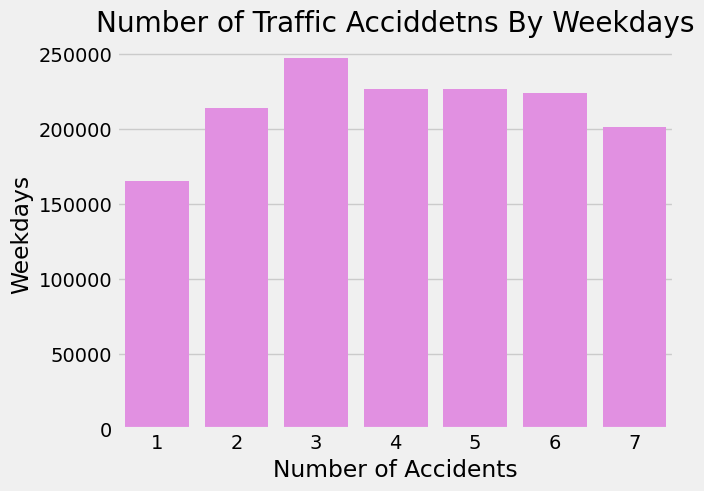

In [38]:
#Accident rates by week
week = df1["Day_of_Week"].value_counts()
week
weeks = df1["Day_of_Week"].unique()
num_weeks = week.values
sns.barplot(x=weeks,y=num_weeks,color='violet')
plt.title("Number of Traffic Acciddetns By Weekdays")
plt.xlabel("Number of Accidents")
plt.ylabel("Weekdays")



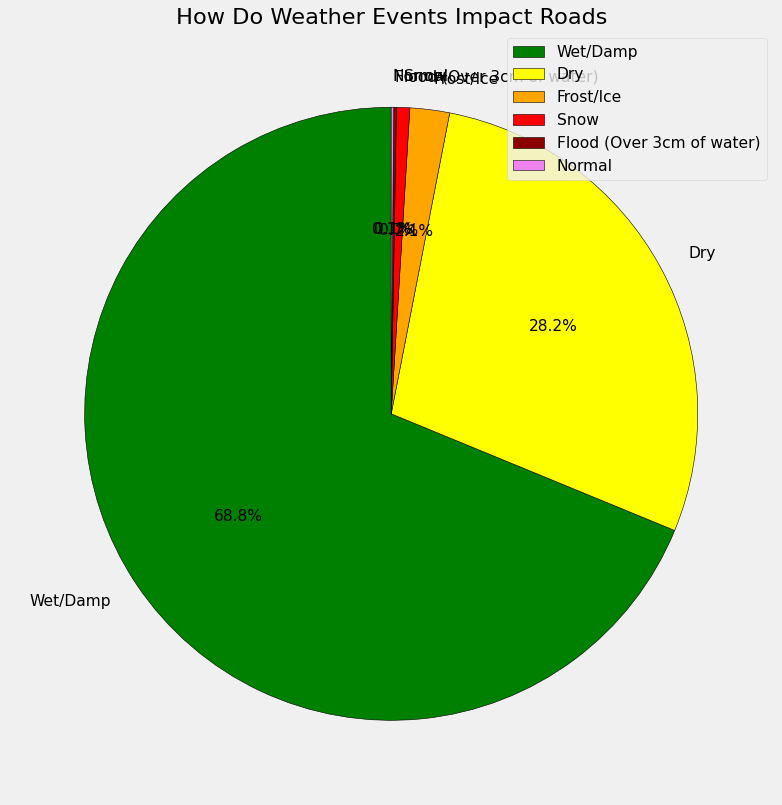

In [39]:

#Accident rates due to road conditions
road_conditions = df1["Road_Surface_Conditions"].value_counts()
road_conditions_values = df1["Road_Surface_Conditions"].unique()
custom___colors = ['green', 'yellow', 'orange', 'red', 'darkred','violet']

figure(figsize=(10, 10), dpi=80)
plt.pie(road_conditions,labels = road_conditions_values,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},
        startangle=90,colors=custom___colors)
plt.tight_layout()
plt.legend()
plt.title("How Do Weather Events Impact Roads")
plt.show()


Text(0.5, 1.0, 'Accident Rate by Weather Condition')

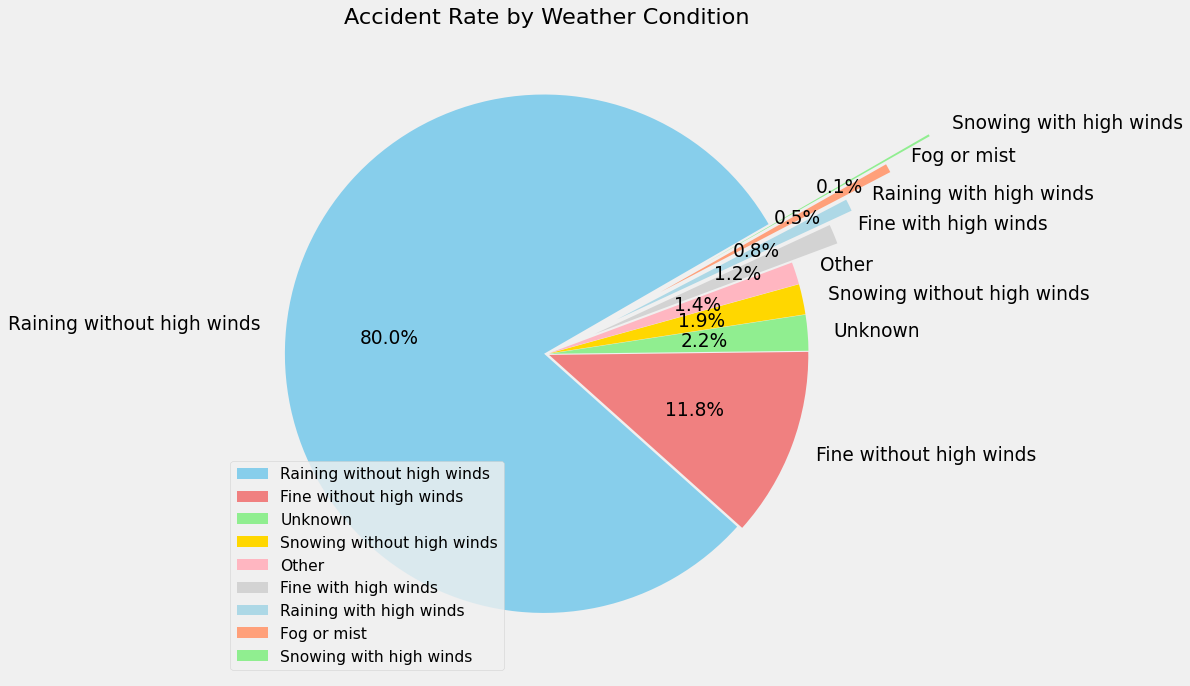

In [40]:

#Accident rates due to weather conditions
weather_cond = df1["Weather_Conditions"].value_counts()
weather_cond_values= df1["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values
custom_colors_ = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightgrey', 'lightblue', 'lightsalmon', 'lightgreen']
figure(figsize=(10, 10), dpi=80)
plt.pie(weather_cond, labels = weather_cond_values,startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%",colors=custom_colors_)
plt.legend(loc ="lower left")
plt.title("Accident Rate by Weather Condition")



Text(0.5, 1.0, 'Urban Area vs Rural Area')

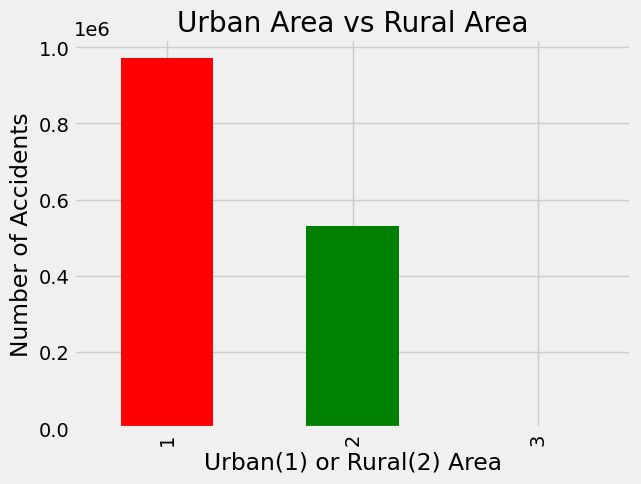

In [41]:
#Accidents rates in urban and rural areas
plt.style.use('fivethirtyeight')
df1["Urban_or_Rural_Area"].value_counts().plot(kind='bar', color=['red', 'green','yellow'])
plt.ylabel("Number of Accidents")
plt.xlabel("Urban(1) or Rural(2) Area")
plt.title("Urban Area vs Rural Area")



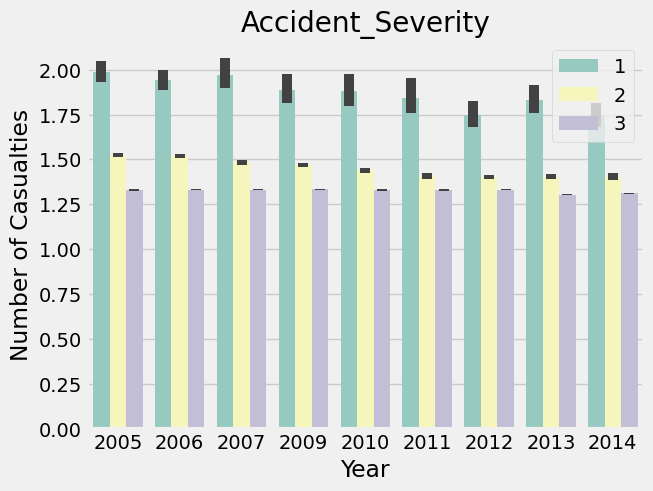

In [42]:

#Number of injured in accidents and the severity of accidents
sns.barplot(x="Year",y="Number_of_Casualties",data=df1,hue="Accident_Severity",palette="Set3")
plt.title("Accident_Severity")
plt.ylabel("Number of Casualties")
plt.legend(loc="upper right")
plt.show()
